<a href="https://colab.research.google.com/github/Eminent01/AMMI_Research/blob/main/AMMI_Research_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow-gpu tensorflow gym-anytrading gym stable-baselines


In [ ]:
# !pip install stable-baselines[mpi]

In [6]:
!pip install gym 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install gym-anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 KB 4.5 MB/s eta 0:00:00


In [8]:
import gym_anytrading
import gym

In [9]:
!pip install stable_baselines3
# from stable_baselines3 import A2C

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616825 sha256=cda3e2d4034aec1f1eb85906e0b0fdd654568abad48f23725e4f923129c70cdd
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.0.0
    Uninstalling importlib-metadata-6.0.0:
      Successfully uninstalled importlib-metadata-6.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [10]:
from stable_baselines3 import A2C 
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
data = pd.read_csv('/content/ETH.csv') 

In [11]:
# df = pd.read_csv('/content/datasets.csv') 

In [21]:
data.head()

,Date,Open,High,Low,Close
0,12/01/2022,"1,296.99","1,305.67","1,263.68","1,276.85"
1,11/30/2022,"1,219.38","1,299.77","1,212.15","1,296.99"
2,11/29/2022,"1,172.32","1,225.15","1,158.48","1,219.38"
3,11/28/2022,"1,215.05","1,216.62","1,150.38","1,172.11"
4,11/27/2022,"1,209.93","1,222.21","1,197.00","1,216.21"


In [22]:
data.dtypes

Date     object
Open     object
High     object
Low      object
Close    object
dtype: object

In [23]:
data ['Date'] = pd.to_datetime(data ['Date'])
data.set_index('Date', inplace=True)

In [17]:
# df ['date'] = pd.to_datetime(df ['date'])
# df.set_index('date', inplace=True)

In [24]:
data['Open'] = data['Open'].apply(lambda x: float(x.replace(",", "")))
data['High'] = data['High'].apply(lambda x: float(x.replace(",", "")))
data['Low'] = data['Low'].apply(lambda x: float(x.replace(",", "")))
data['Close'] = data['Close'].apply(lambda x: float(x.replace(",", "")))

In [25]:
env = gym.make('stocks-v0', df=data, frame_bound=(5,30), window_size=5)

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  class ObservationWrapper(Wrapper):
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.


In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break

info {'total_reward': 14.659999999999854, 'total_profit': 1.0832592545180386, 'position': 1}


/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environme

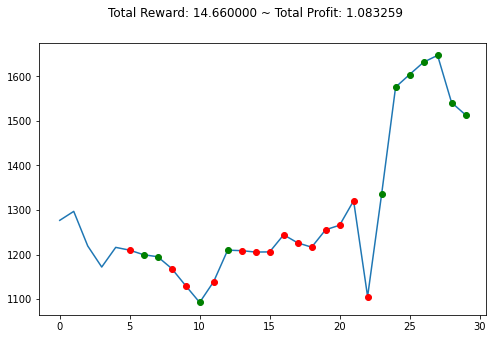

In [ ]:
plt.figure(figsize=(8,5))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_build = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,30), window_size=5)
env = DummyVecEnv([env_build])

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
from stable_baselines3.sac.policies import MlpPolicy
# from stable_baselines3.sac.policies import MlpLstmPolicy

In [ ]:
# !pip install stable-baselines3[extra]

In [ ]:
# Instantiate the agent
model = DQN("MlpPolicy", env, verbose=1)
# Train the agent and display a progress bar
model.learn(total_timesteps=int(2e5), progress_bar=False)

Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 6448     |
|    time_elapsed     | 0        |
|    total_timesteps  | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6281     |
|    time_elapsed     | 0        |
|    total_timesteps  | 192      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 5935     |
|    time_elapsed     | 0        |
|    total_timesteps  | 288      |
----------------------------------
----------------------------------
| r

/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environme

Streaming output truncated to the last 5000 lines.
|    fps              | 926      |
|    time_elapsed     | 176      |
|    total_timesteps  | 163104   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.7     |
|    n_updates        | 28275    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6800     |
|    fps              | 925      |
|    time_elapsed     | 176      |
|    total_timesteps  | 163200   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 22.9     |
|    n_updates        | 28299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6804     |
|    fps              | 925      |
|   

In [ ]:
# model_train = A2C(MlpPolicy, env, verbose=1)
# # model_train = A2C('MlpLstmPolicy', env, verbose=1) 
# model_train.learn(total_timesteps=100000)

##Testing the Reinforcement Model

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(25,35), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 62.069999999999936, 'total_profit': 1.0254491235257193, 'position': 1}


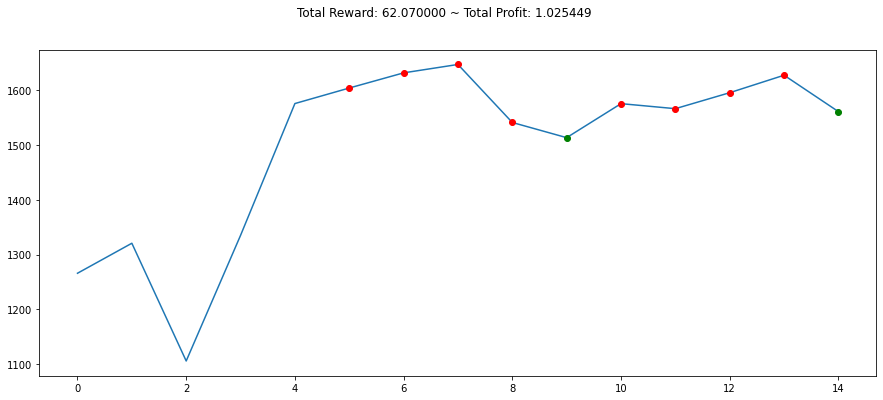

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [2]:
# import numpy as np
# import pandas as pd
# import random
# from collections import deque
# import keras
# from keras import backend as K
# from keras.models import Model
# from keras.layers import Dense, Input, LSTM
# from keras.optimizers import Adam

# class PortfolioEnv:
#     def __init__(self, data, window_size, episode_length, init_invest):
#         self.data = data
#         self.window_size = window_size
#         self.episode_length = episode_length
#         self.init_invest = init_invest
#         self.cur_step = 0
#         self.stock_price_history = []
#         self.portfolio_value_history = []

#     def reset(self):
#         self.cur_step = 0
#         self.stock_owned = np.zeros(len(self.data.columns))
#         self.stock_price = self.data.iloc[self.cur_step]
#         self.cash = self.init_invest
#         return self._get_state()

#     def _get_state(self):
#         state = np.concatenate([
#             self.stock_owned,
#             self.stock_price,
#             [self.cash]
#         ])
#         return state

#     def _take_action(self, action):
#         # all the stocks we can buy
#         valid_actions = np.arange(len(self.data.columns) + 1)

#         # check if the action is valid
#         if action not in valid_actions:
#             raise Exception("Invalid action")

#         # buy stock
#         if action != len(self.data.columns):
#             # calculate the amount of cash we can use to buy stock
#             stock_price = self.stock_price[action]
#             max_num_of_stocks = np.floor(self.cash / stock_price)
#             # the number of stocks to buy
#             num_of_stocks = np.random.randint(1, max_num_of_stocks + 1)
#             self.stock_owned[action] += num_of_stocks
#             self.cash -= stock_price * num_of_stocks

#         # sell stock
#         else:
#             # get the number of stocks we can sell
#             stocks_to_sell = np.random.randint(0, np.sum(self.stock_owned) + 1)
#             for i in range(len(self.stock_owned)):
#                 if self.stock_owned[i] > 0:
#                     stocks_to_sell_for_i = min(stocks_to_sell, self.stock_owned[i])
#                     self.stock_owned[i] -= stocks_to_sell_for_i
#                     stocks_to_sell -= stocks_to_sell_for_i
#                     self.cash += stocks_to_sell_for_i * self.stock_price[i]

#         self.cur_step += 1
#         self.stock_price = self.data.iloc[self.cur_step]

#         # calculate the portfolio value at the end of each day
#         portfolio_value = self.cash + np.sum(self.stock_owned * self.stock_price)
#         # self.


In [ ]:
# import numpy as np
# import pandas as pd
# import random
# from collections import deque
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam

# # Define the environment
# class PortfolioEnv:
#     def __init__(self, data, window_size, episode_steps, initial_investment):
#         self.data = data
#         self.window_size = window_size
#         self.episode_steps = episode_steps
#         self.initial_investment = initial_investment
#         self.n_stock = data.shape[1]
#         self.reset()

#     def reset(self):
#         self.cur_step = 0
#         self.stock_owned = np.zeros(self.n_stock)
#         self.stock_price = self.data.iloc[self.cur_step, :]
#         self.cash_in_hand = self.initial_investment
#         return self._get_state()

#     def _get_state(self):
#         return np.concatenate([
#             self.stock_owned,
#             np.array(self.stock_price),
#             np.array([self.cash_in_hand])
#         ])

#     def _take_action(self, action):
#         action_vec = np.zeros(self.n_stock)
#         action_vec[action] = 1
#         cost = np.sum(self.stock_price * action_vec * self.stock_owned)
#         self.stock_owned -= action_vec
#         self.cash_in_hand += cost

#     def step(self, action):
#         self._take_action(action)
#         self.cur_step += 1
#         if self.cur_step >= self.window_size:
#             self.cur_step = 0
#         self.stock_price = self.data.iloc[self.cur_step, :]
#         reward = self._get_reward()
#         done = self._is_done()
#         state = self._get_state()
#         return state, reward, done, None

#     def _get_reward(self):
#         return self.cash_in_hand

#     def _is_done(self):
#         return self.cur_step == self.episode_steps

# # Define the agent
# class PortfolioAgent:
#     def __init__(self, state_size, action_size, lr):
#         self.state_size = state_size
#         self.action_size = action_size
#         self.lr = lr
#         self.memory = deque(maxlen=1000)
#         self.gamma = 0.95
#         self.epsilon = 1.0
#         self.epsilon_min = 0.01
#         self.epsilon_decay = 0.995
#         self.model = self._build_model()

#     def _build_model(self):
#         model = Sequential()
#         model.add(Dense(128, input_dim=self.state_size, activation='relu'))
#         model.add(Dense(64, activation='relu'))
#         model.add(Dense(


In [26]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Import the stock data
# data = pd.read_csv('/content/ETH.csv')

# Define the state and action space
num_stocks = data.shape[1] - 1
state_space = np.zeros((num_stocks, num_stocks))
np.fill_diagonal(state_space, 1)
action_space = [i / 100.0 for i in range(-100, 110, 10)]

# Define the reward function
def reward_function(state, action):
    portfolio = np.dot(state, data.iloc[:,:-1].T)
    returns = (portfolio / np.sum(portfolio)) * action
    return np.sum(returns)

# Define the Q-learning algorithm
def q_learning(num_episodes, discount_factor, learning_rate, epsilon):
    Q = np.zeros((num_stocks, len(action_space)))
    returns = []
    for episode in range(num_episodes):
        state = state_space[random.choice(range(num_stocks))]
        episode_return = 0
        done = False
        while not done:
            if random.uniform(0,1) < epsilon:
                action = random.choice(action_space)
            else:
                action = action_space[np.argmax(Q[np.where(state == 1)][0])]
            new_state = state * action
            reward = reward_function(state, action)
            episode_return += reward
            Q[np.where(state == 1), action_space.index(action)] += learning_rate * (reward + discount_factor * np.max(Q[np.where(new_state == 1)]) - Q[np.where(state == 1), action_space.index(action)])
            state = new_state
            if np.sum(new_state) == 0:
                done = True
        returns.append(episode_return)
    return Q, returns

# Train the Q-learning algorithm
Q, returns = q_learning(num_episodes=10000, discount_factor=0.95, learning_rate=0.01, epsilon=0.05)

# Plot the returns
sns.lineplot(x=range(len(returns)), y=returns)
plt.xlabel('Episode')
plt.ylabel('Return')
plt.title('Portfolio Optimization with Q-Learning')
plt.show()


ValueError: ignored

In [4]:
data

,Date,Open,High,Low,Close
0,12/01/2022,"1,296.99","1,305.67","1,263.68","1,276.85"
1,11/30/2022,"1,219.38","1,299.77","1,212.15","1,296.99"
2,11/29/2022,"1,172.32","1,225.15","1,158.48","1,219.38"
3,11/28/2022,"1,215.05","1,216.62","1,150.38","1,172.11"
4,11/27/2022,"1,209.93","1,222.21","1,197.00","1,216.21"
...,...,...,...,...,...
361,12/05/2021,"4,065.98","4,250.76","4,040.11","4,153.22"
362,12/04/2021,"4,207.42","4,251.10","3,521.01","4,066.10"
363,12/03/2021,"4,546.81","4,656.95","4,053.03","4,218.61"
364,12/02/2021,"4,569.99","4,633.66","4,437.10","4,545.44"


In [5]:
data.iloc[:,1:]

,Open,High,Low,Close
0,"1,296.99","1,305.67","1,263.68","1,276.85"
1,"1,219.38","1,299.77","1,212.15","1,296.99"
2,"1,172.32","1,225.15","1,158.48","1,219.38"
3,"1,215.05","1,216.62","1,150.38","1,172.11"
4,"1,209.93","1,222.21","1,197.00","1,216.21"
...,...,...,...,...
361,"4,065.98","4,250.76","4,040.11","4,153.22"
362,"4,207.42","4,251.10","3,521.01","4,066.10"
363,"4,546.81","4,656.95","4,053.03","4,218.61"
364,"4,569.99","4,633.66","4,437.10","4,545.44"
